# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:

RES <- list()

library(multcomp)


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

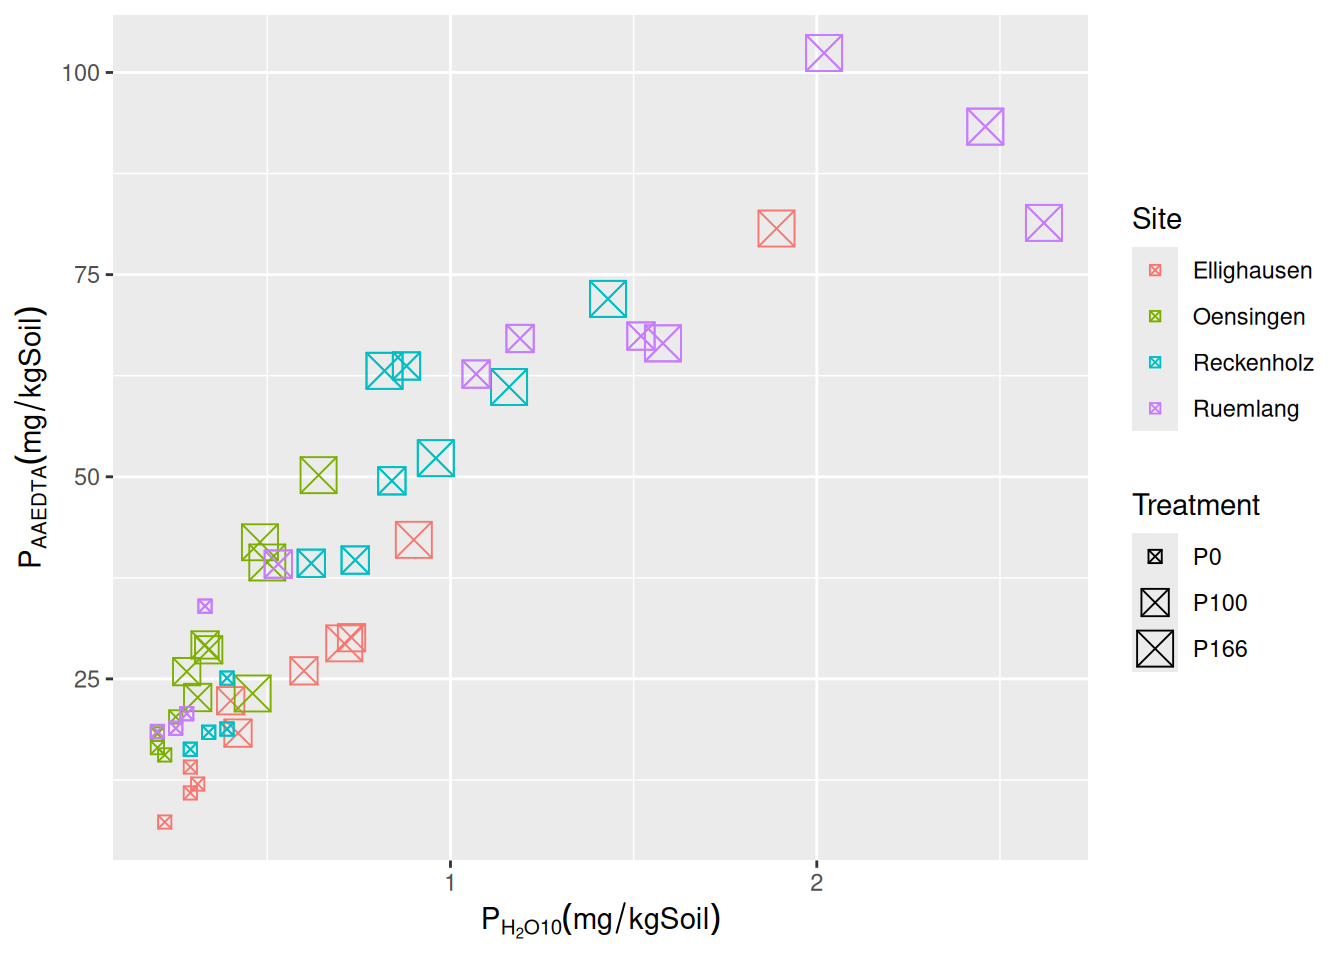

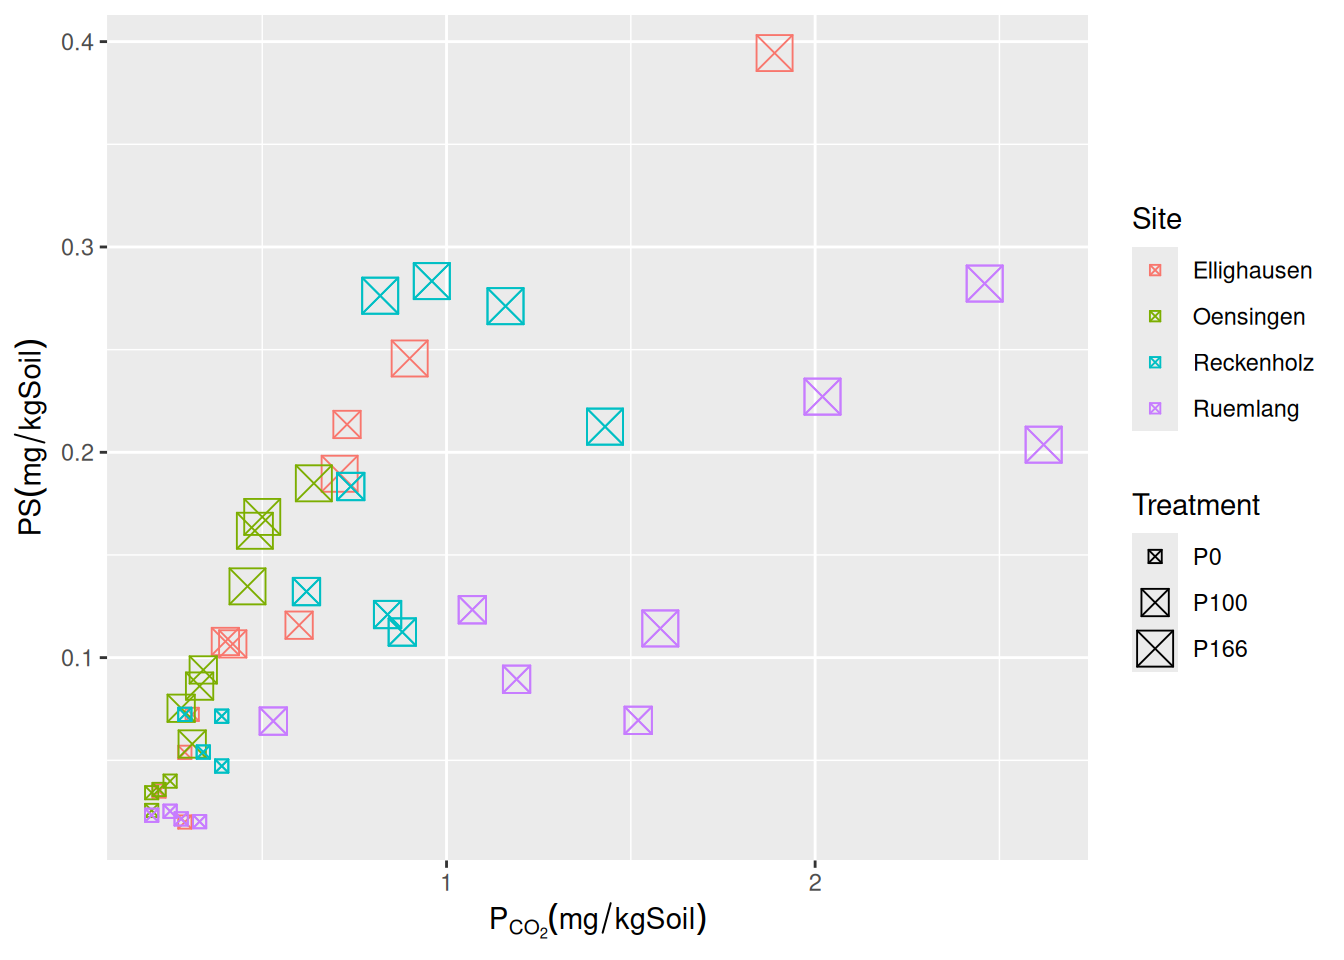

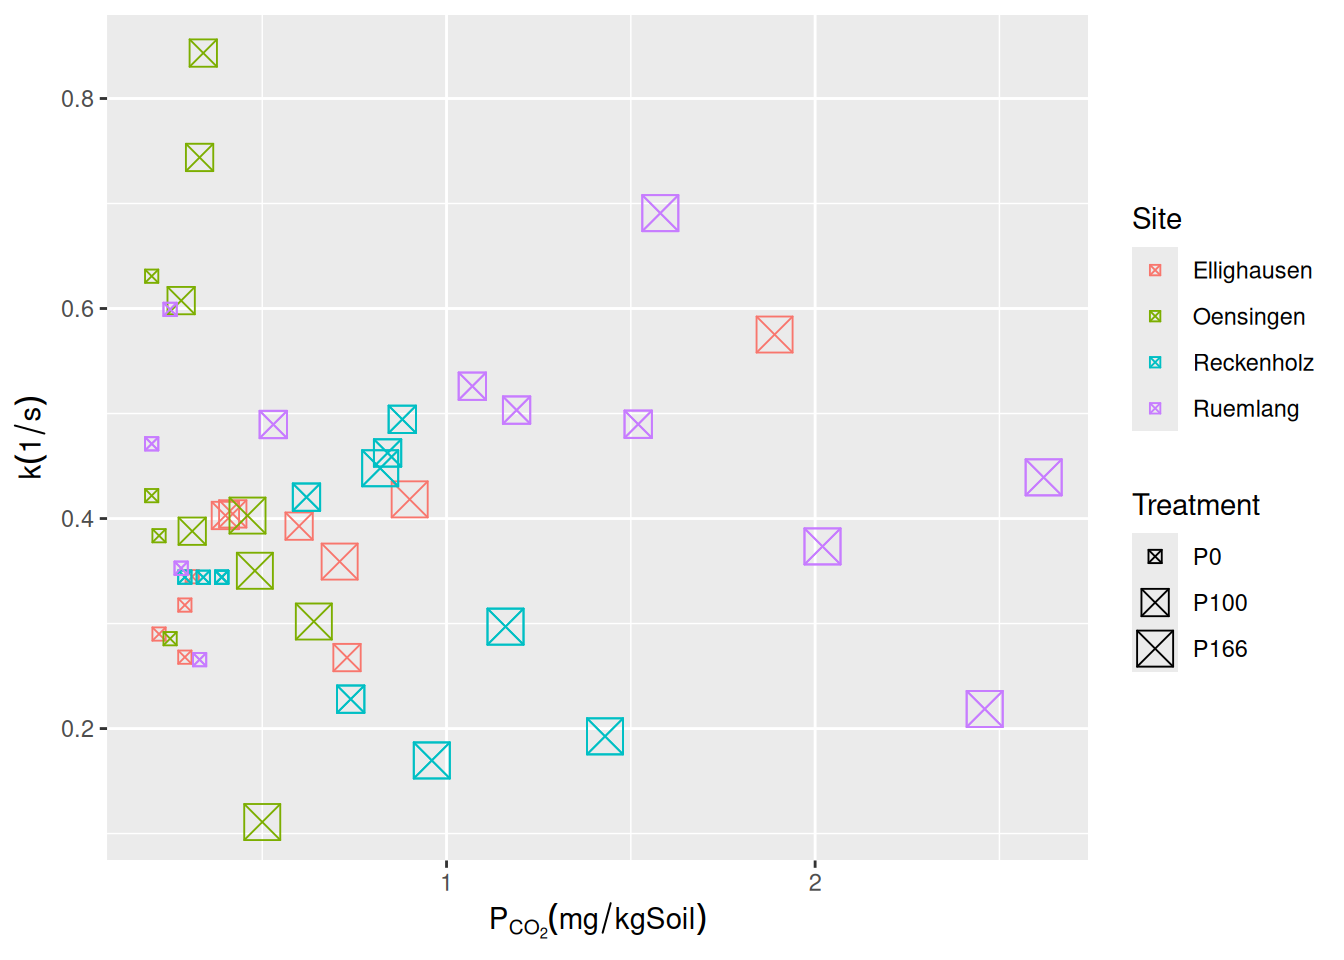

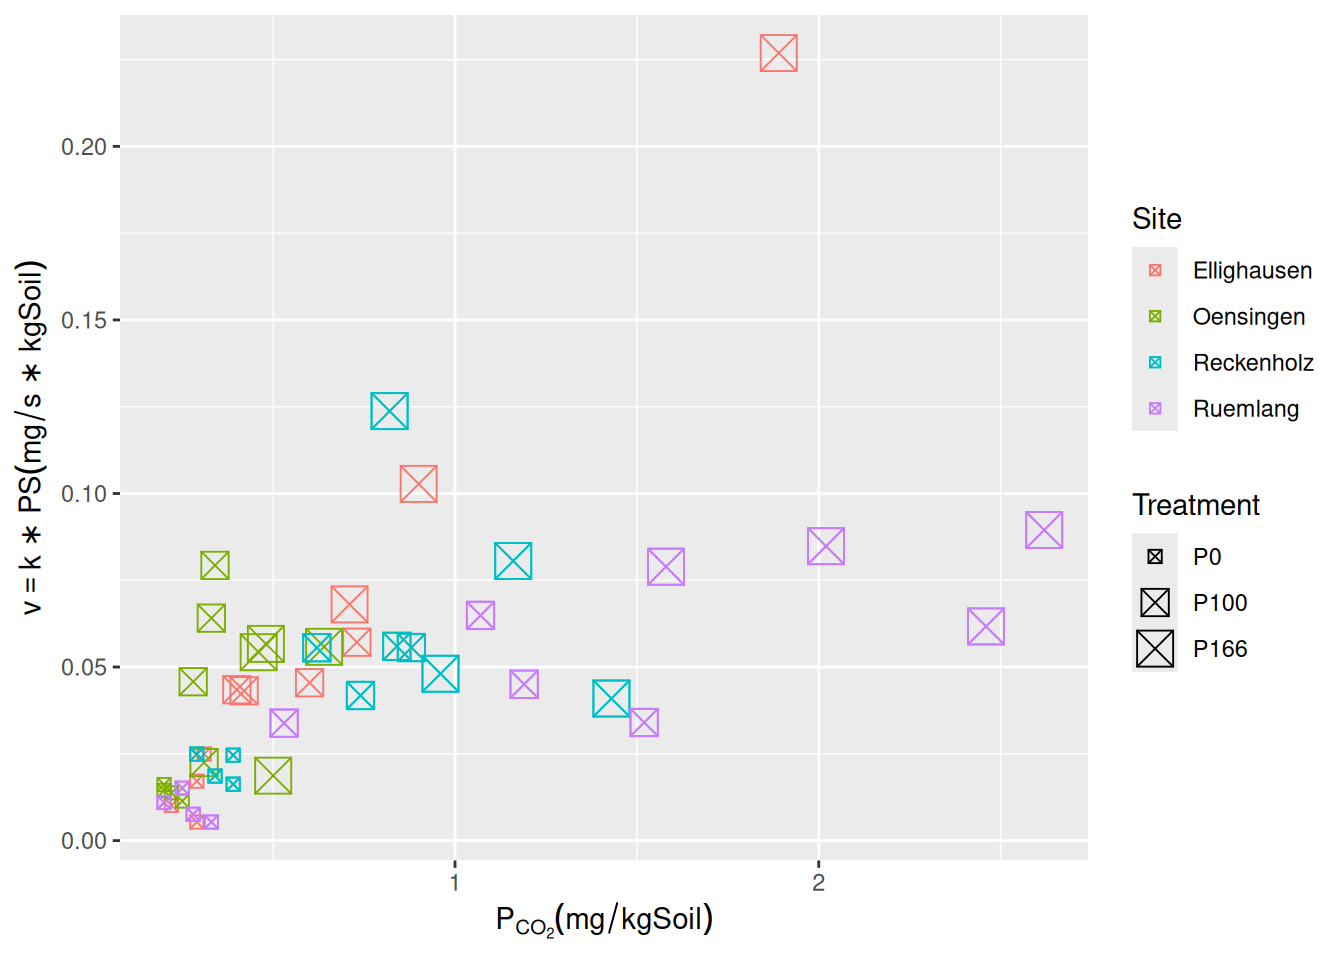

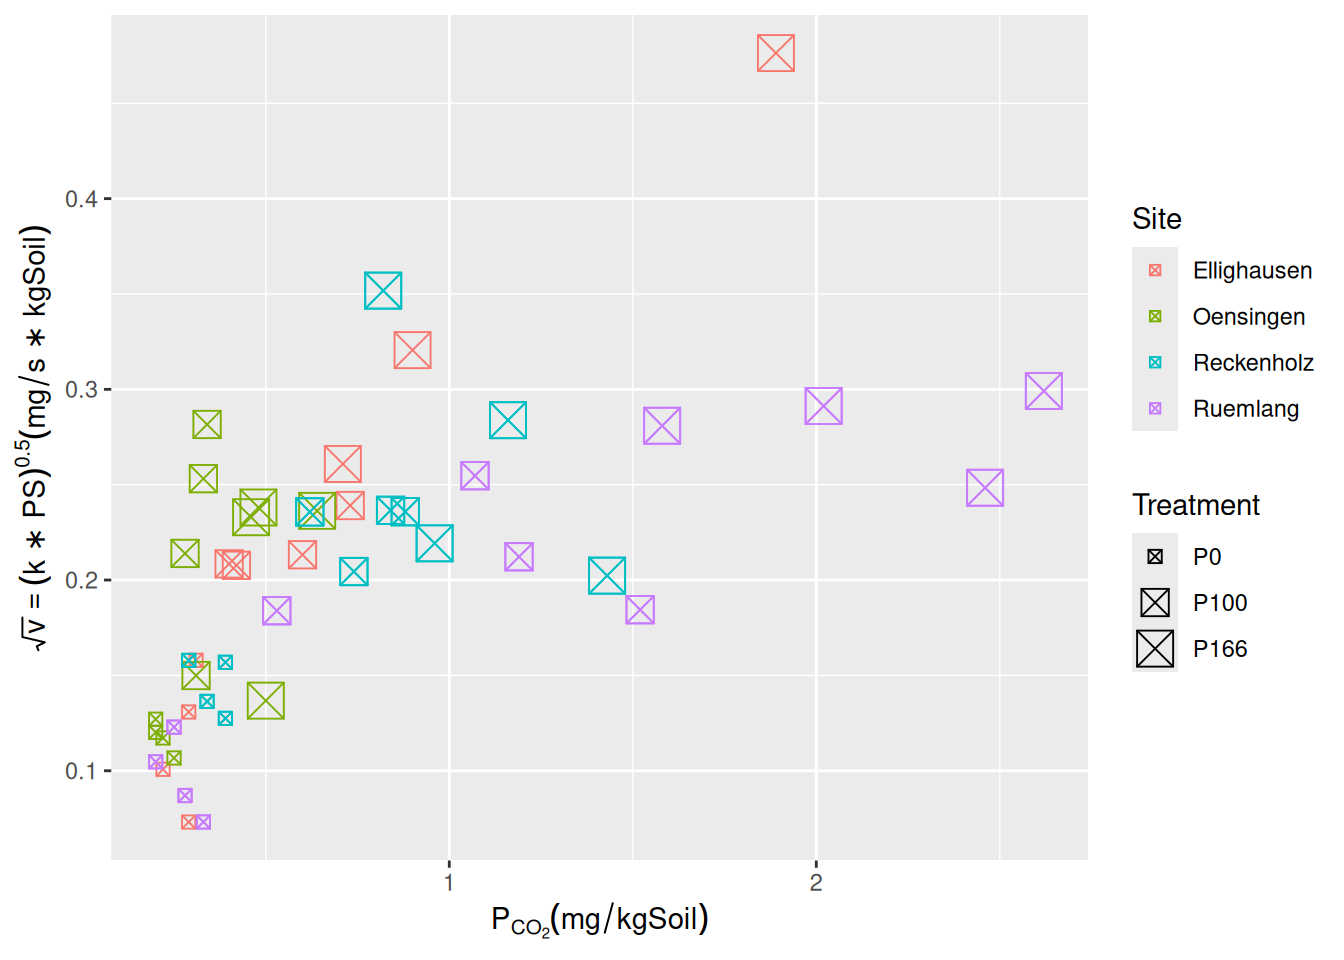

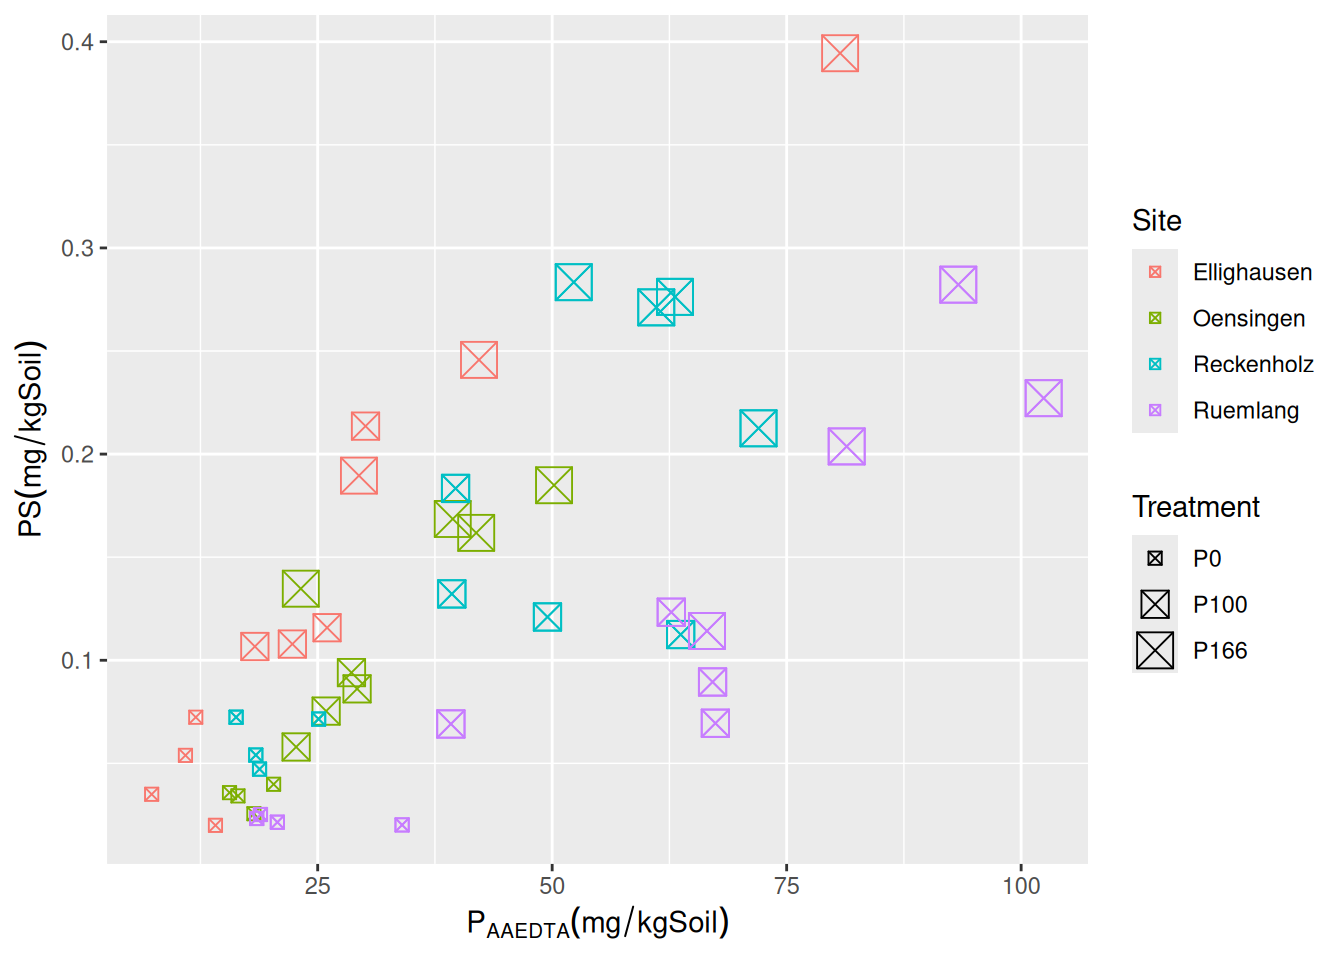

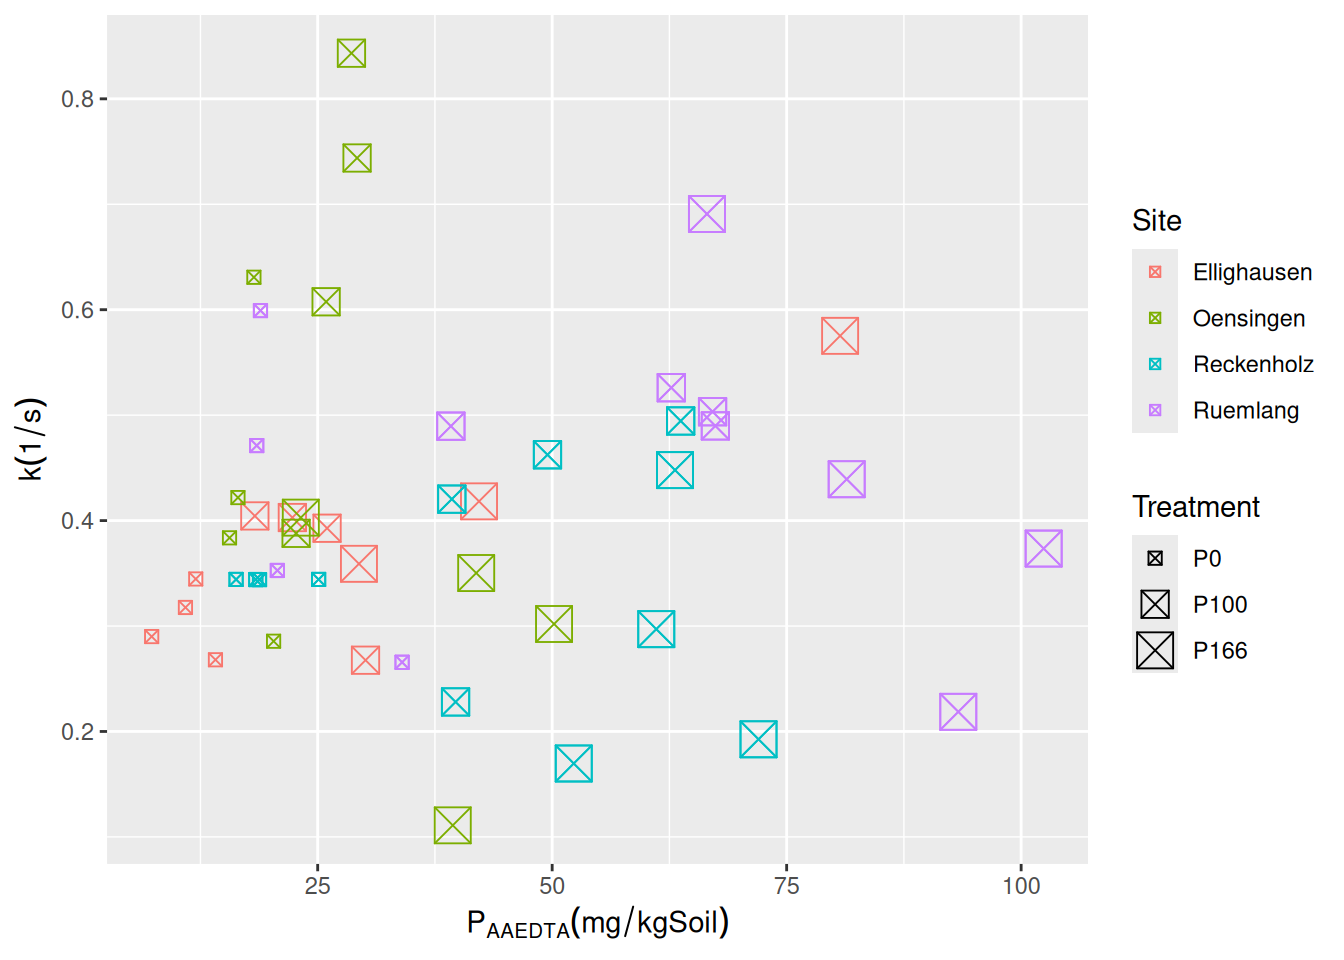

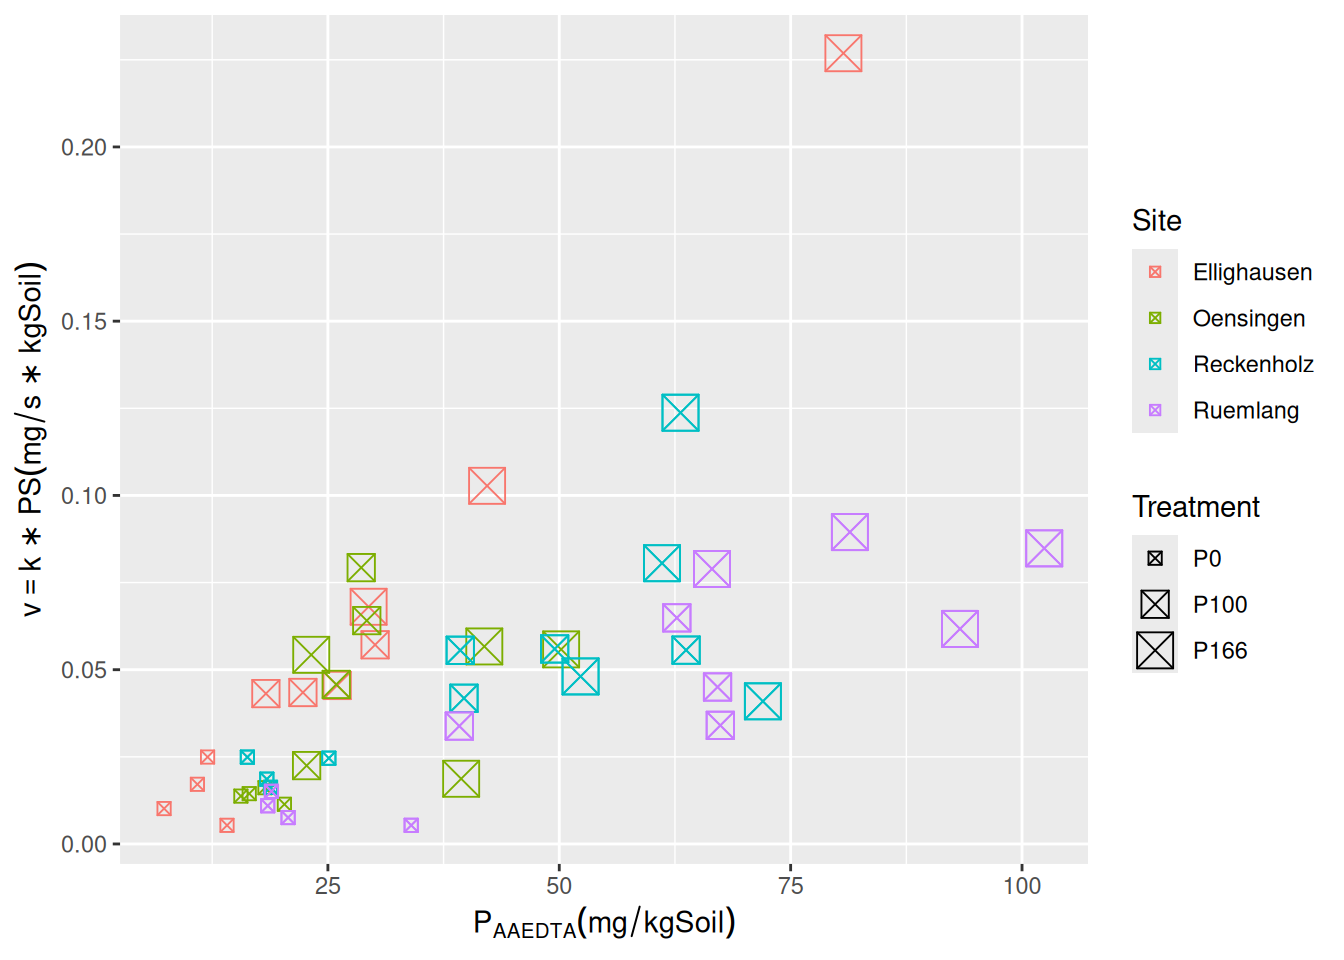

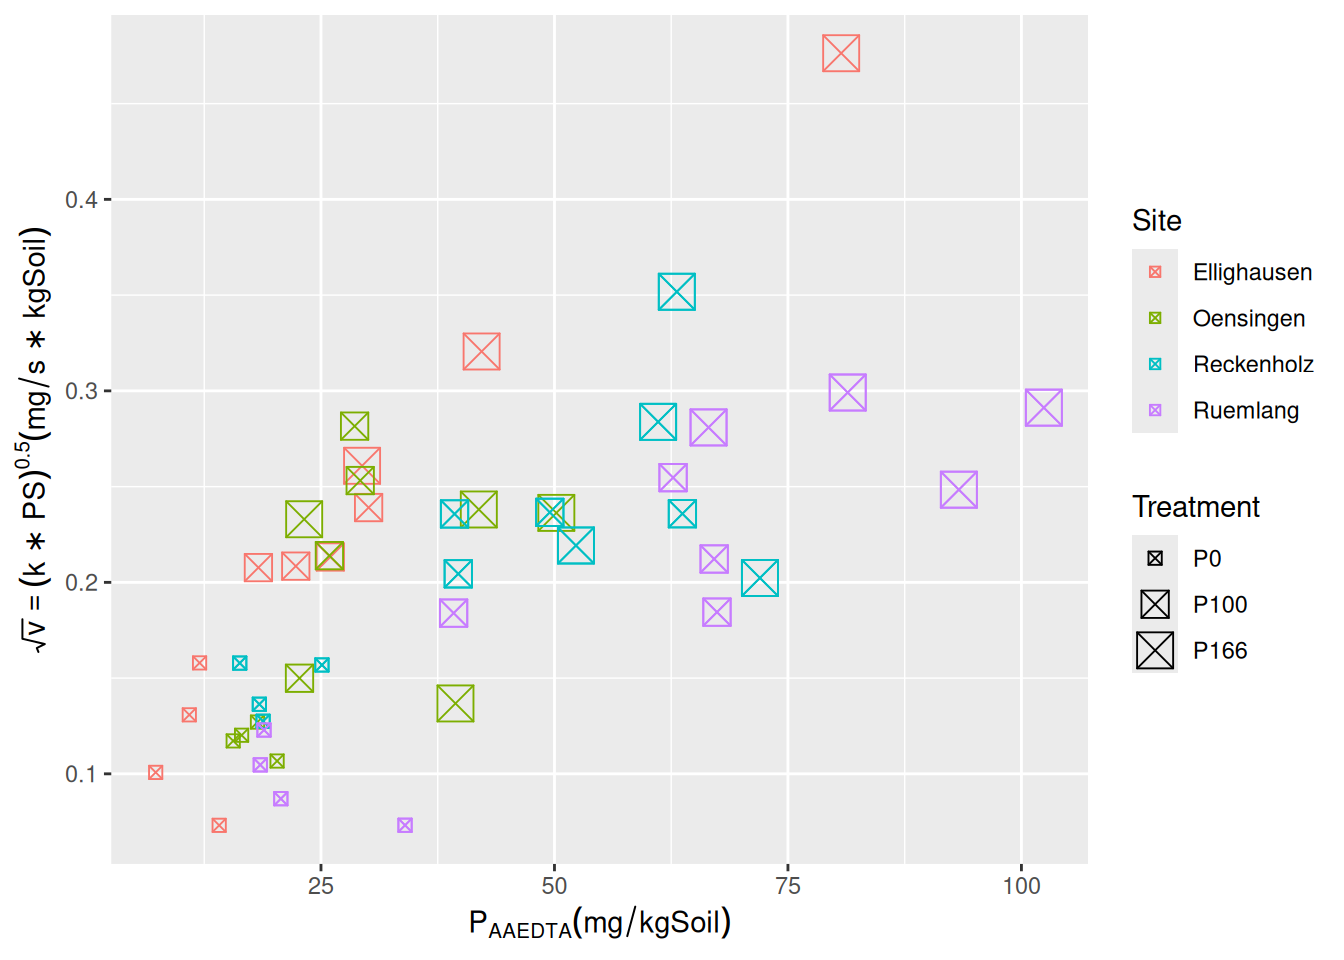

In [ ]:

p6 <- ggplot(nlme.coef,aes(y=soil_0_20_P_AAE10, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{H_2O10}(mg/kg Soil)$"),
         y=TeX("$P_{AAEDTA}(mg/kg Soil)$"))
  

p6


Nun noch die Linearen Regressionen, die ausstehend sind:

In [ ]:
# Wovon hängen Modelparameter ab?

fit.PS       <- lm(PS            ~ soil_0_20_clay+ soil_0_20_pH_H2O + soil_0_20_Corg + soil_0_20_silt + fert_P_tot, nlme.coef)
fit.k        <- lm(k             ~ soil_0_20_clay+ soil_0_20_pH_H2O + soil_0_20_Corg + soil_0_20_silt + fert_P_tot, nlme.coef)
fit.kPS      <- lm(I(sqrt(k*PS)) ~ soil_0_20_clay+ soil_0_20_pH_H2O + soil_0_20_Corg + soil_0_20_silt + fert_P_tot, nlme.coef)
fit.Yrel     <- lm(Ymain_rel         ~ k + PS + I(sqrt(k*PS)) + Treatment + Site, nlme.coef)
fit.Puptake  <- lm(annual_P_uptake   ~ k + PS + I(sqrt(k*PS)) + Treatment + Site, nlme.coef)

Anova(fit.PS)


Anova Table (Type II tests)

Response: PS
                  Sum Sq Df F value    Pr(>F)    
soil_0_20_clay   0.00644  1  1.2395   0.26966    
soil_0_20_pH_H2O 0.00077  1  0.1476   0.70207    
soil_0_20_Corg   0.00565  1  1.0880   0.30077    
soil_0_20_silt   0.02651  1  5.1044   0.02723 *  
fert_P_tot       0.17551  1 33.7904 2.025e-07 ***
Residuals        0.33762 65                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: k
                  Sum Sq Df F value   Pr(>F)   
soil_0_20_clay   0.09689  1  6.4345 0.013603 * 
soil_0_20_pH_H2O 0.08392  1  5.5730 0.021250 * 
soil_0_20_Corg   0.04900  1  3.2539 0.075890 . 
soil_0_20_silt   0.11540  1  7.6638 0.007333 **
fert_P_tot       0.00457  1  0.3037 0.583448   
Residuals        0.97879 65                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + fert_P_tot, data = nlme.coef)

Linear Hypotheses:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept) == 0      -0.5430471  0.3294215  -1.648   0.3802  
soil_0_20_clay == 0   -0.0145069  0.0057190  -2.537   0.0643 .
soil_0_20_pH_H2O == 0  0.0653963  0.0277019   2.361   0.0964 .
soil_0_20_Corg == 0    0.1581359  0.0876661   1.804   0.2953  
soil_0_20_silt == 0    0.0171654  0.0062006   2.768   0.0360 *
fert_P_tot == 0       -0.0004669  0.0008472  -0.551   0.9754  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: I(sqrt(k * PS))
                   Sum Sq Df F value   Pr(>F)    
soil_0_20_clay   0.001592  1  0.3815  0.53896    
soil_0_20_pH_H2O 0.003686  1  0.8829  0.35087    
soil_0_20_Corg   0.018543  1  4.4423  0.03892 *  
soil_0_20_silt   0.001267  1  0.3035  0.58359    
fert_P_tot       0.124767  1 29.8901 7.79e-07 ***
Residuals        0.271323 65                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(sqrt(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + fert_P_tot, data = nlme.coef)

Linear Hypotheses:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0      -0.036800   0.173441  -0.212    1.000    
soil_0_20_clay == 0   -0.001860   0.003011  -0.618    0.962    
soil_0_20_pH_H2O == 0  0.013705   0.014585   0.940    0.836    
soil_0_20_Corg == 0    0.097282   0.046156   2.108    0.166    
soil_0_20_silt == 0   -0.001798   0.003265  -0.551    0.976    
fert_P_tot == 0        0.002439   0.000446   5.467    <0.01 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: Ymain_rel
                 Sum Sq Df F value  Pr(>F)  
k                368.55  1  5.0369 0.03072 *
PS                74.49  1  1.0181 0.31936  
I(sqrt(k * PS))  145.48  1  1.9882 0.16666  
Treatment        449.01  2  3.0683 0.05817 .
Site             241.63  3  1.1008 0.36072  
Residuals       2780.44 38                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: annual_P_uptake
                 Sum Sq Df F value    Pr(>F)    
k                 37.11  1  1.6509    0.2036    
PS                 2.46  1  0.1092    0.7421    
I(sqrt(k * PS))   21.16  1  0.9414    0.3357    
Treatment         41.55  2  0.9243    0.4022    
Site            1078.53  3 15.9952 8.213e-08 ***
Residuals       1393.53 62                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: PS
                    Sum Sq Df F value   Pr(>F)    
soil_0_20_P_CO2   0.001974  1  0.5735 0.451518    
soil_0_20_P_AAE10 0.017149  1  4.9833 0.028940 *  
fert_P_tot        0.050558  1 14.6913 0.000282 ***
Residuals         0.230570 67                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: k
                   Sum Sq Df F value Pr(>F)
soil_0_20_P_CO2   0.01069  1  0.5183 0.4741
soil_0_20_P_AAE10 0.00924  1  0.4476 0.5058
fert_P_tot        0.00017  1  0.0084 0.9275
Residuals         1.38237 67               


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10 + fert_P_tot, 
    data = nlme.coef)

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0        3.893e-01  3.699e-02  10.525   <1e-04 ***
soil_0_20_P_CO2 == 0   -4.957e-02  6.885e-02  -0.720    0.854    
soil_0_20_P_AAE10 == 0  1.198e-03  1.791e-03   0.669    0.880    
fert_P_tot == 0         9.096e-05  9.954e-04   0.091    1.000    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: I(sqrt(k * PS))
                    Sum Sq Df F value    Pr(>F)    
soil_0_20_P_CO2   0.000099  1  0.0382 0.8456730    
soil_0_20_P_AAE10 0.018657  1  7.1665 0.0093309 ** 
fert_P_tot        0.043962  1 16.8868 0.0001104 ***
Residuals         0.174422 67                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(sqrt(k * PS)) ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10 + 
    fert_P_tot, data = nlme.coef)

Linear Hypotheses:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0       0.1046761  0.0131398   7.966   <0.001 ***
soil_0_20_P_CO2 == 0   0.0047786  0.0244555   0.195   0.9974    
soil_0_20_P_AAE10 == 0 0.0017027  0.0006360   2.677   0.0297 *  
fert_P_tot == 0        0.0014530  0.0003536   4.109   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: Ymain_rel
                  Sum Sq Df F value   Pr(>F)   
soil_0_20_P_CO2    112.9  1  1.0332 0.315103   
soil_0_20_P_AAE10  158.9  1  1.4531 0.234616   
fert_P_tot         891.2  1  8.1522 0.006595 **
Residuals         4700.9 43                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: annual_P_uptake
                   Sum Sq Df  F value Pr(>F)    
soil_0_20_P_CO2     14.46  1   0.9794 0.3259    
soil_0_20_P_AAE10   99.91  1   6.7694 0.0114 *  
fert_P_tot        1760.32  1 119.2684 <2e-16 ***
Residuals          988.87 67                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1